## Tarea 1  
### Preprocesamiento de datos
##### Luis Enrique López Nerio 1487280
Se utilizara una base de datos tabular que contiene reviews de libros de ciencia de datos vendidos en amazon.


Especificaciones de la versión de python

In [4]:
import sys

print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


#### Librerias

In [86]:
import pandas as pd
import numpy as np 
import pandas as pd 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import string
from nltk.tokenize import word_tokenize
import seaborn as sns
sns.set()

#### Lectura de la base
La base cuenta con tres columnas: 
| Estrellas | Comentario | URL |
|-----------|------------|-----|

In [36]:

base = pd.read_csv('Reviews.csv',quotechar="\"")

In [38]:
base.head(4)

,stars,comment,book_url
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130


Se añade la columna de `base['LongitudComentario']` para contabilizar la longitud del comentario dejado en cada libro 

In [41]:
base['LongitudComentario'] = base['comment'].apply(lambda x: len(str(x).split()))

In [15]:
base.count()

stars       20647
comment     20647
book_url    20647
dtype: int64

In [17]:
base.describe()

,stars
count,20647.000000
mean,4.309197
std,1.205554
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [44]:

base.isnull().sum()

stars               0
comment             0
book_url            0
Longitud_comment    0
dtype: int64

#### Preprocesamiento
## Análisis de texto
Se realizara el preprocesamiento para un review o comentario

In [49]:
comentario = base['comment'].loc[0]
comentario

'Let me say at the outset of this review, that I respect the author and the sheer guile of trying to attack what is a Ph.D. level topic, in a single book. I have been an SW engineer for the last 15 years, have an engineering degree, and have done some research into GA\'s and image segmentation, many years ago... and I found this book challenging.When I was in college, the joke about Comp Sci was that it was really just "applied math." That wasn\'t really funny, but it is gosh-darned true, doubly so when dealing with data science, AI, and ML, all of which are fancy words for "applied statistics."So, the book gives you a background in various topics such as stat, probability theory, linear algebra, programming, and touches on a few topics from calculus. If you\'re unfamiliar with those things, you will not be able to learn them from one book, or all at once. It\'s just too much.The author leaves lots of bread-crumbs for you to follow. If you\'re not strong any of the subjects I\'ve menti

Tokenizar(separar en palabras)

In [53]:
palabras = word_tokenize(comentario)
#palabras

Convertir a minusculas

In [57]:
palabras = [palabra.lower() for palabra in palabras ]
#palabras

remover signos de puntuacion

In [68]:

tabla = str.maketrans('', '', string.punctuation)
palabras = [palabra.translate(tabla) for palabra in palabras]
#palabras

Remover stopwords o palabras que no sean alfanumericas

In [72]:
stop_words = set(stopwords.words('english'))
#stop_words

In [74]:
palabras = [palabra for palabra in palabras if palabra.isalpha()]
palabras = [palabra for palabra in palabras if not palabra in stop_words]

Realizar el proceso de "lematización"

In [80]:
lemmatizer = WordNetLemmatizer() 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [81]:
palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras]

In [103]:
fd = nltk.FreqDist(palabras)
frecuencia = pd.DataFrame(fd.items(), columns=['word', 'frequency'])

In [111]:
frecuencia = frecuencia.sort_values('frequency',ascending=False)
frecuencia = frecuencia.head(20)
frecuencia

,word,frequency
14,book,7
12,topic,3
44,science,3
43,data,3
92,people,2
37,nt,2
21,done,2
87,equation,2
34,really,2
35,applied,2


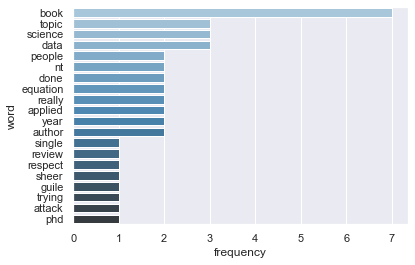

In [120]:
 ax = sns.barplot(y='word', x='frequency',data = frecuencia,palette="Blues_d")

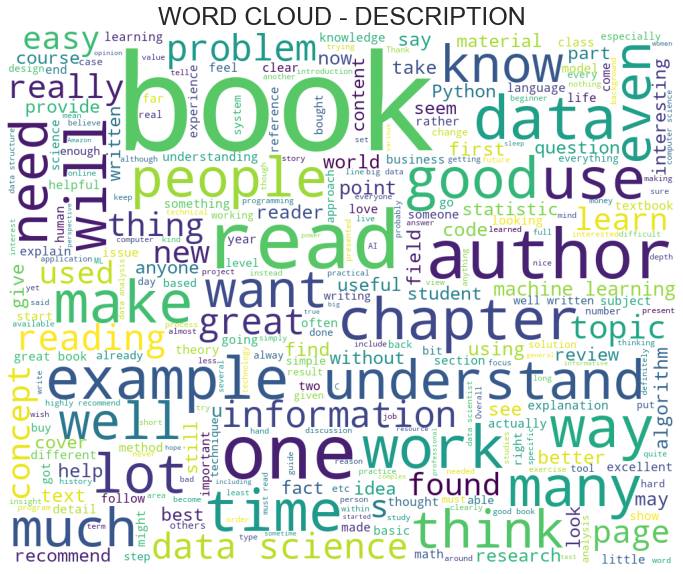

In [123]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#stopwords = set(STOPWORDS)

#newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

#stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    #stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(base['comment'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

Realizar el preprosemiento para todos los datos

In [90]:
def preprocesamiento2(comentario):
    palabras = word_tokenize(comentario)
    palabras = [palabra.lower() for palabra in palabras ]
    palabras = [palabra.translate(tabla) for palabra in palabras]
    palabras = [palabra for palabra in palabras if palabra.isalpha()]
    palabras = [palabra for palabra in palabras if not palabra in stop_words]
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras]
    return palabras

In [96]:
comentario

'Let me say at the outset of this review, that I respect the author and the sheer guile of trying to attack what is a Ph.D. level topic, in a single book. I have been an SW engineer for the last 15 years, have an engineering degree, and have done some research into GA\'s and image segmentation, many years ago... and I found this book challenging.When I was in college, the joke about Comp Sci was that it was really just "applied math." That wasn\'t really funny, but it is gosh-darned true, doubly so when dealing with data science, AI, and ML, all of which are fancy words for "applied statistics."So, the book gives you a background in various topics such as stat, probability theory, linear algebra, programming, and touches on a few topics from calculus. If you\'re unfamiliar with those things, you will not be able to learn them from one book, or all at once. It\'s just too much.The author leaves lots of bread-crumbs for you to follow. If you\'re not strong any of the subjects I\'ve menti

In [97]:
" ".join(palabras)

'let say outset review respect author sheer guile trying attack phd level topic single book sw engineer last year engineering degree done research ga image segmentation many year ago found book challengingwhen college joke comp sci really applied math nt really funny goshdarned true doubly dealing data science ai ml fancy word applied statistic book give background various topic stat probability theory linear algebra programming touch topic calculus unfamiliar thing able learn one book muchthe author leaf lot breadcrumb follow strong subject mentioned plan reading book recommends online book solid tour data science surprisingly material aiml well done criticism would liked equation alongside code know equation scare people data science tldr seriousminded book serious people nt easy answer great education'

In [93]:
base['lematize'] = base['comment'].apply(lambda x:preprocesamiento2(x))

In [94]:
base

,stars,comment,book_url,Longitud_comment,lematize
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130,258,"[let, say, outset, review, respect, author, sh..."
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130,196,"[capitalism, best, read, book, nearby, booksto..."
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130,61,"[looking, get, started, data, science, confuse..."
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130,106,"[general, good, book, cover, wide, variety, to..."
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130,151,"[academic, data, scientist, decade, term, coin..."
...,...,...,...,...,...
20642,3.0,This book offers nice information and thoughts...,https://www.amazon.com/dp/0980200482,28,"[book, offer, nice, information, thought, thin..."
20643,5.0,"Am disabled, retired RN, but always wished I w...",https://www.amazon.com/dp/0980200482,26,"[disabled, retired, rn, always, wished, librar..."
20644,3.0,At one point I considered library work as oppo...,https://www.amazon.com/dp/0980200482,84,"[one, point, considered, library, work, oppose..."
20645,5.0,"Overall, I think this is an excellent resource...",https://www.amazon.com/dp/0980200482,89,"[overall, think, excellent, resource, anyone, ..."


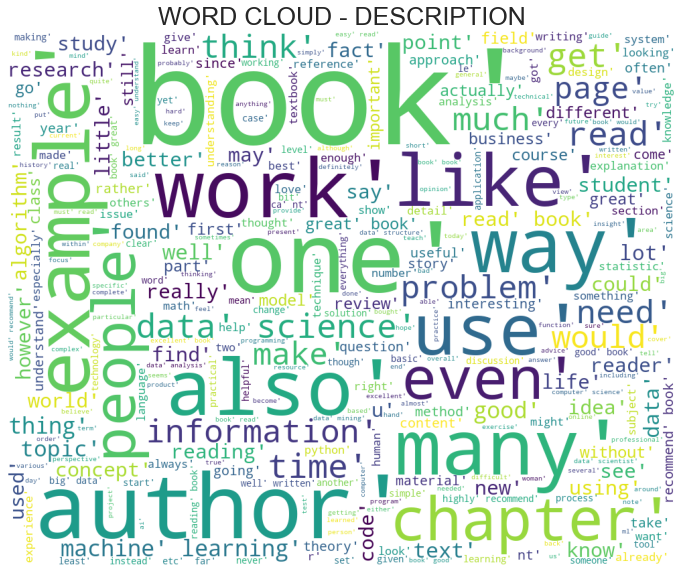

In [124]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#stopwords = set(STOPWORDS)

#newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

#stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    #stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(base['lematize'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()